In [1]:
print("Welcome to machine learning")

Welcome to machine learning


In [2]:
import sys
assert sys.version_info>=(3,7)

In [3]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_7460\2839428726.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity'>

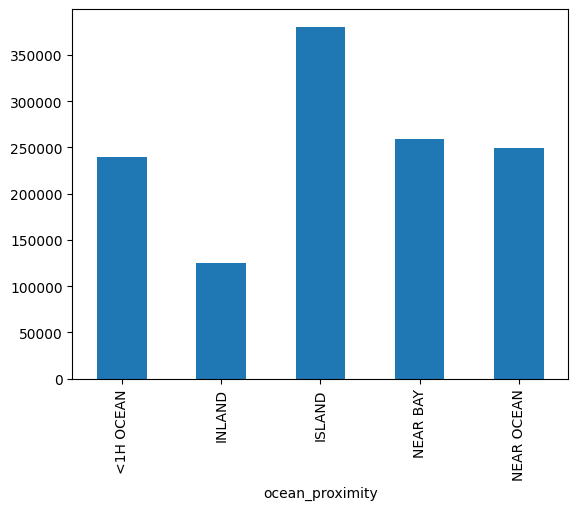

In [8]:
#plotting a bar graph of categories of ocean proximity vs the mean house value
housing.groupby('ocean_proximity')['median_house_value'].mean().plot.bar()

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

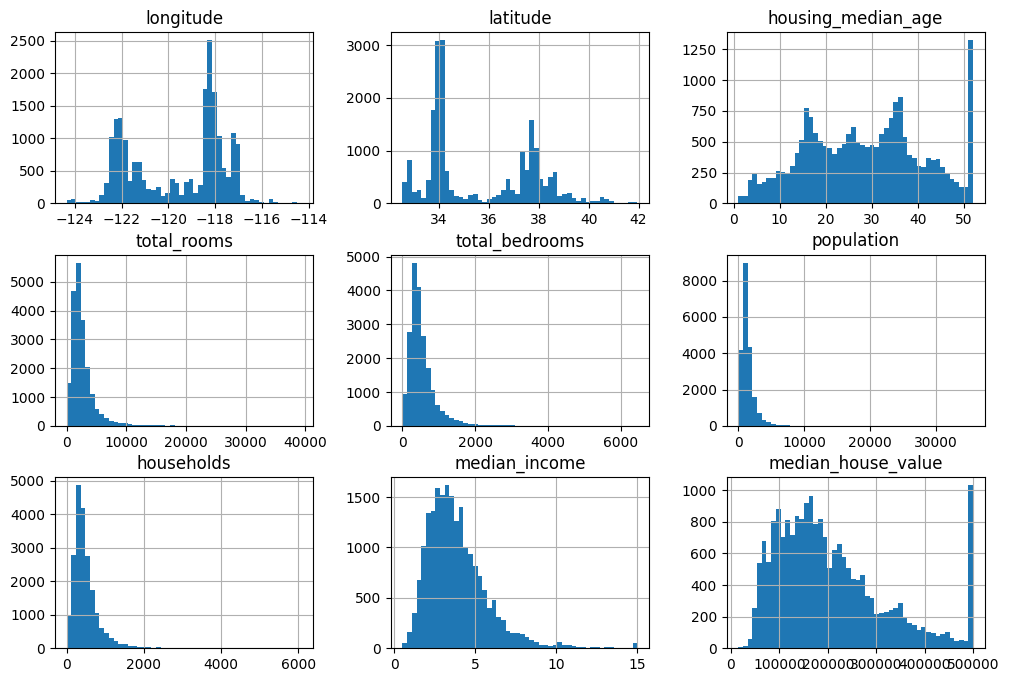

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))


In [11]:
# import numpy as np
# def split_data(data,test_ratio):
#     np.random.seed(42)
#     shuffled_indices=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test=shuffled_indices[:test_set_size]
#     train = shuffled_indices[test_set_size:]
#     return data.iloc[train],data.iloc[test]
# train_data,test_data=split_data(housing,0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [13]:
import numpy as np

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [15]:
 from sklearn.model_selection import StratifiedShuffleSplit
 split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 for train_index, test_index in split.split(housing, housing["income_cat"]):
     strat_train_set = housing.loc[train_index]
     strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
for set in (strat_train_set,strat_test_set):
    set.drop(["income_cat"],axis=1,inplace=True)

In [18]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

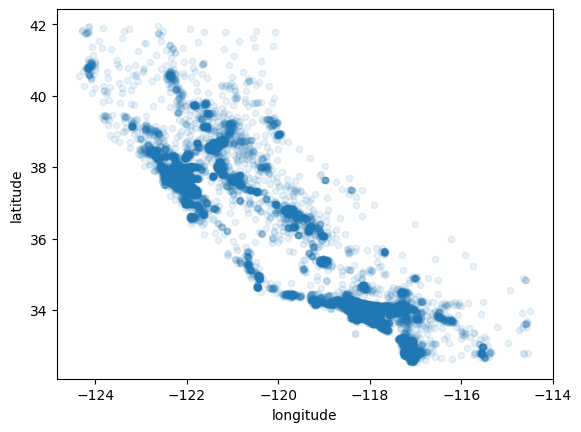

In [19]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

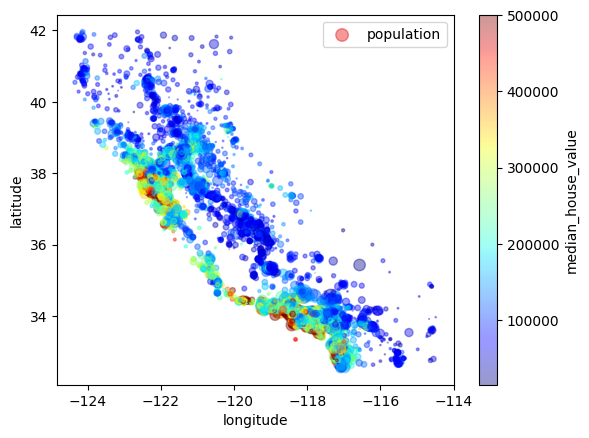

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, ) 
plt.legend()

In [21]:
corr_matrix=housing.corr(numeric_only=True)

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

In [25]:
housing=strat_train_set.drop("median_house_value",axis=1)

In [26]:
housing_labels=strat_train_set['median_house_value'].copy()

In [27]:
# median=housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median)

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [29]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [30]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
X=imputer.transform(housing_num)

In [32]:
X.shape

(16512, 8)

In [33]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing['ocean_proximity']
housing_cat_encoded=encoder.fit_transform(housing_cat)

In [35]:
housing_cat_encoded

array([3, 0, 1, ..., 4, 0, 4], shape=(16512,))

In [36]:
#using one hot encoder to create one binary attribute per category
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [37]:
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [38]:
#to directly transform categorical attributes to one hot encoding
# from sklearn.preprocessing import LabelBinarizer
# encoder=labelBinarizer()
# housing_cat_1hot=encoder.fit_transform(housing_cat)

In [39]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self  # nothing else to do 
    def transform(self, X, y=None): 
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] 
        else:
            return np.c_[X, rooms_per_household, population_per_household] 
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [41]:
#as multiple data transformations need to be performed in the right sequence its important to have a pipeline which can be executed with the help of sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
housing_num_tr.shape

(16512, 11)

In [44]:
from sklearn.pipeline import FeatureUnion

In [45]:
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [47]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [48]:
housing_prepared=full_pipeline.fit_transform(housing)

In [49]:
housing_prepared.shape

(16512, 16)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5]

In [53]:
 some_data_prepared = full_pipeline.transform(some_data)

In [54]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]


In [55]:
 print("Labels:\t\t", list(some_labels))

Labels:		 [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [56]:
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared) 
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(67769.12117461127)

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [58]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_predictions,housing_labels)
tree_rmse=np.sqrt(tree_mse)

In [59]:
tree_rmse

np.float64(0.0)

In [60]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [61]:
 def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean()) 
     print("Standard deviation:", scores.std())

In [62]:
display_scores(rmse_scores)

Scores: [67224.93100654 68093.29109787 68402.27980508 73627.51035092
 69633.14508753 69211.23172149 70083.55574766 73204.00126283
 69948.58586476 68787.28895684]
Mean: 69821.58209014984
Standard deviation: 1980.7173822712723


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10) 
lin_rmse_scores = np.sqrt(-lin_scores) 
display_scores(lin_rmse_scores)

Scores: [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
Mean: 67994.06678091262
Standard deviation: 1394.9377015503271


In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [65]:
forest_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(forest_predictions,housing_labels)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

np.float64(18531.644251783353)

In [66]:
# forest_rmses = -cross_val_score(forest_reg, housing_prepared, housing_labels,
#                                 scoring="neg_root_mean_squared_error", cv=10)
# display_scores(forest_rmses)

In [67]:
print('h')

h


In [72]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30],
                'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10],
               'max_features': [2, 3, 4]}, ]
forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [73]:
 grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

63383.63757693762 {'max_features': 2, 'n_estimators': 3}
55647.82913853055 {'max_features': 2, 'n_estimators': 10}
52188.67384757198 {'max_features': 2, 'n_estimators': 30}
59696.56632126669 {'max_features': 4, 'n_estimators': 3}
52640.785704711394 {'max_features': 4, 'n_estimators': 10}
50208.842373807674 {'max_features': 4, 'n_estimators': 30}
59015.173124276174 {'max_features': 6, 'n_estimators': 3}
51968.55032226325 {'max_features': 6, 'n_estimators': 10}
49634.473301985876 {'max_features': 6, 'n_estimators': 30}
58265.109769344555 {'max_features': 8, 'n_estimators': 3}
51969.040624499044 {'max_features': 8, 'n_estimators': 10}
49876.654176517026 {'max_features': 8, 'n_estimators': 30}
63091.44521908004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53972.67223882052 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58829.44670898441 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51877.39463101959 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [76]:
final_model=grid_search.best_estimator_

In [77]:
X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

In [78]:
X_test_prepared=full_pipeline.transform(X_test)

In [79]:
final_predictions=final_model.predict(X_test_prepared)

In [81]:
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [82]:
final_rmse

np.float64(49785.079411662184)

In [83]:
The_model=Pipeline([
    ('preprocessing',full_pipeline),
    ('final_model',final_model)
])

In [84]:
The_model.fit(housing,housing_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['longitude',
                                                                                                      'latitude',
                                                                                                      'housing_median_age',
                                                                                                      'total_rooms',
                                                                                                      'total_bedrooms',
                                                                                                      'population',
                                                                                                      'households',
                                                                                                      'median_income'])),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_...
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('selector',
                                                                   DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('final_model',
                 RandomForestRegressor(max_features=6, n_estimators=30))])

In [85]:
import joblib
joblib.dump(The_model,'house_price_model.pkl')

['house_price_model.pkl']